### Menginstall library SHAP ###
Library ini tidak ada dalam google colab sehingga harus diinstall terlebih dahulu


In [8]:
!pip install shap

### Mengimport Libarary Yang Digunakan
tahap ini melakukan deklarasi atau importing library yang akan digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Menyiapkan Dataset Yang Digunakan
Tahapkan melakukan loading dataset yang berasal dari github dicoding academy

In [1]:
df_employee = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv')
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### Assesing Data
Tahap ini adalah tahap data wrangling yang berguna untuk menilai kulitas dan melihat data type pada dataset. Proses ini menggunakan beberapa function dari pandas seperti describe() untuk mengeksplorasi dataset, info() untuk melihat tipe data setiap kolum apakah sudah sesuai atau belum, isnull() untuk mengidentifikasi adanya missing value atau tidak, duplicated() untuk mengidentifikasi adanya data yang duplikat atau tidak dan sum() untuk menghitung jumlah missing value ataupun data yang duplikat.

In [ ]:
df_employee.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

data type pada dataset ini sudah sesuai

In [ ]:
df_employee.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


terdapat missing value pada kolom Attrition

In [ ]:
df_employee.duplicated().sum()

np.int64(0)

dataset ini tidak ada data yang duplikat

### Exploratory Data Analysis (EDA)
Tahap ini dilakukan untuk mengenal dataset yang digunakan. Pada submission ini hanya melakukan 2 EDA saja yaitu melihat korelasi antar kolom pada dataset dan melihat persebaran dataset numerik.

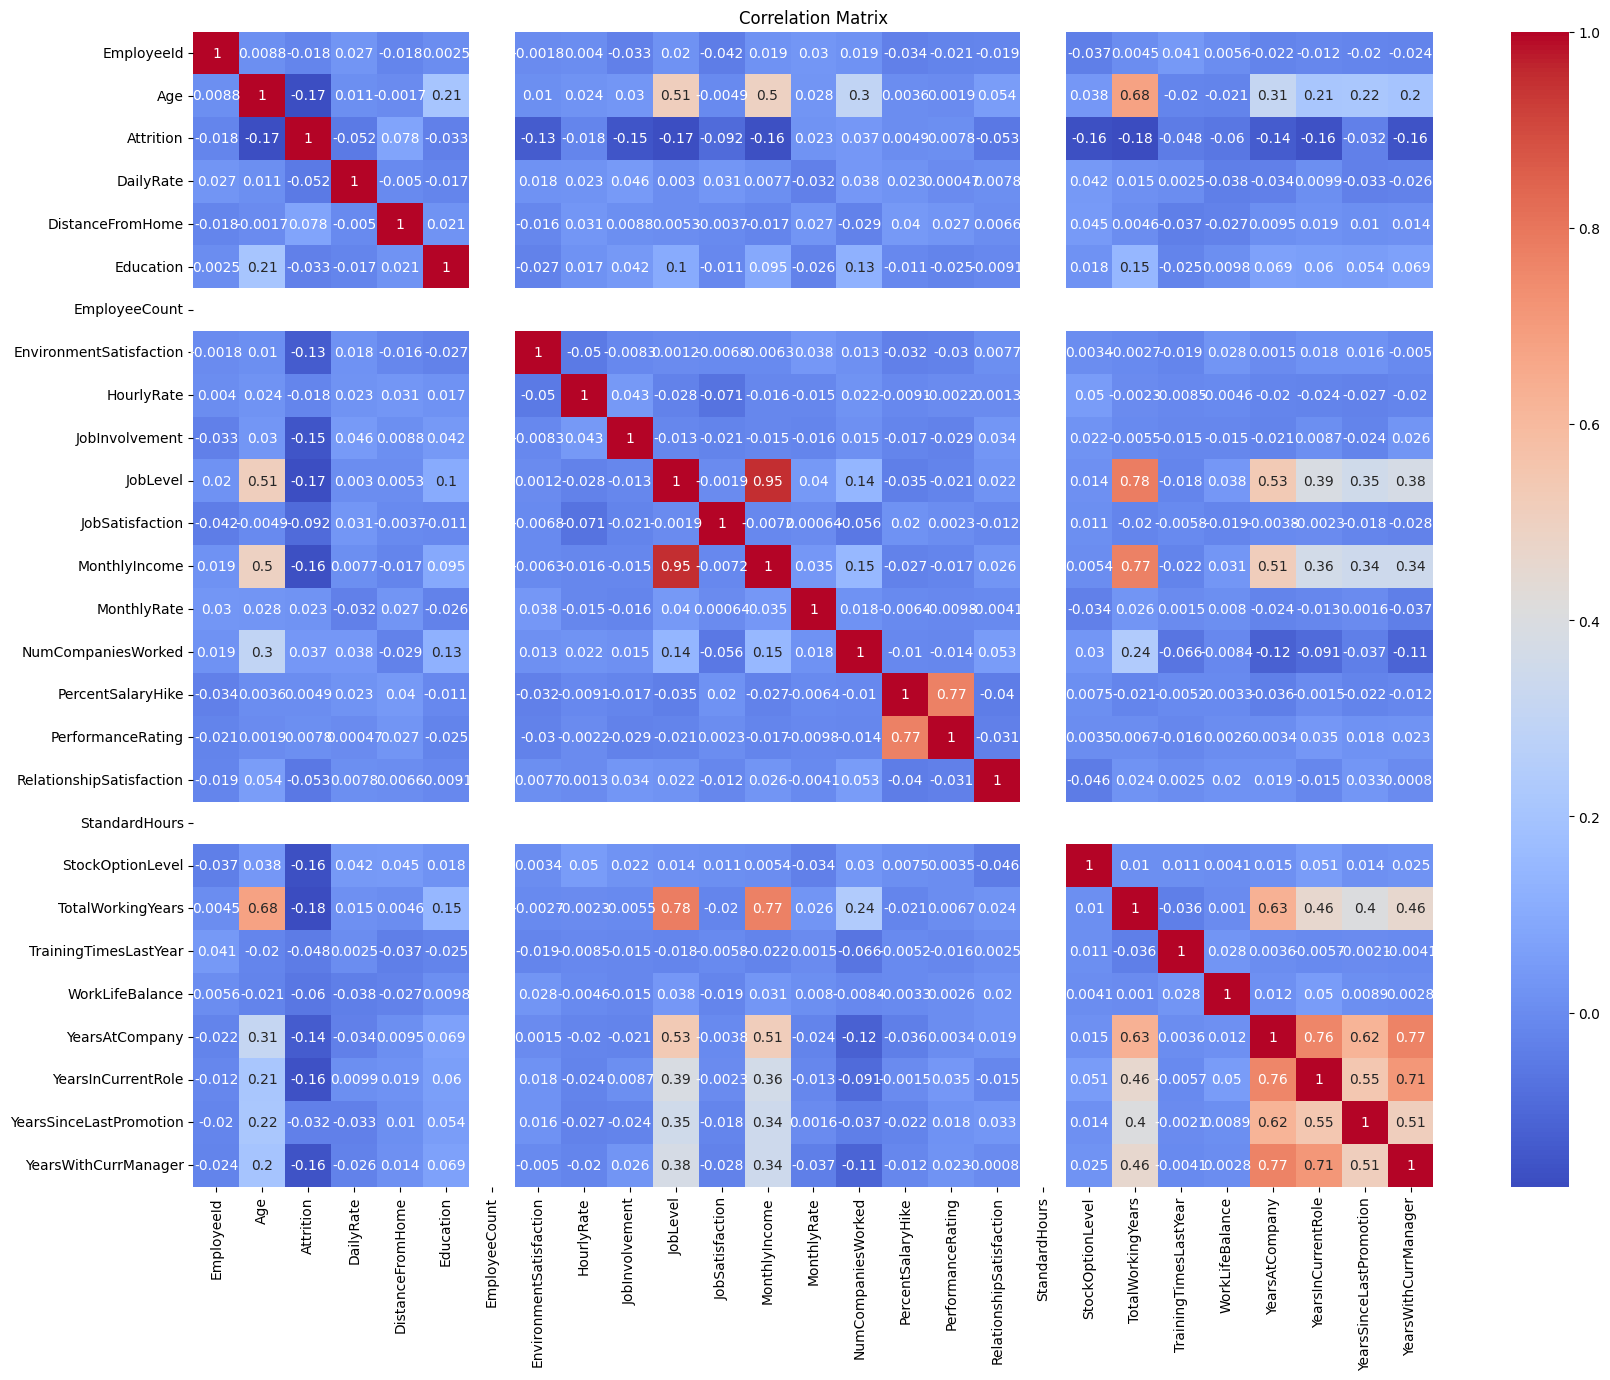

In [ ]:
num_cols = df_employee.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20,15))
corr_amtrix = df_employee[num_cols].corr()
sns.heatmap(corr_amtrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

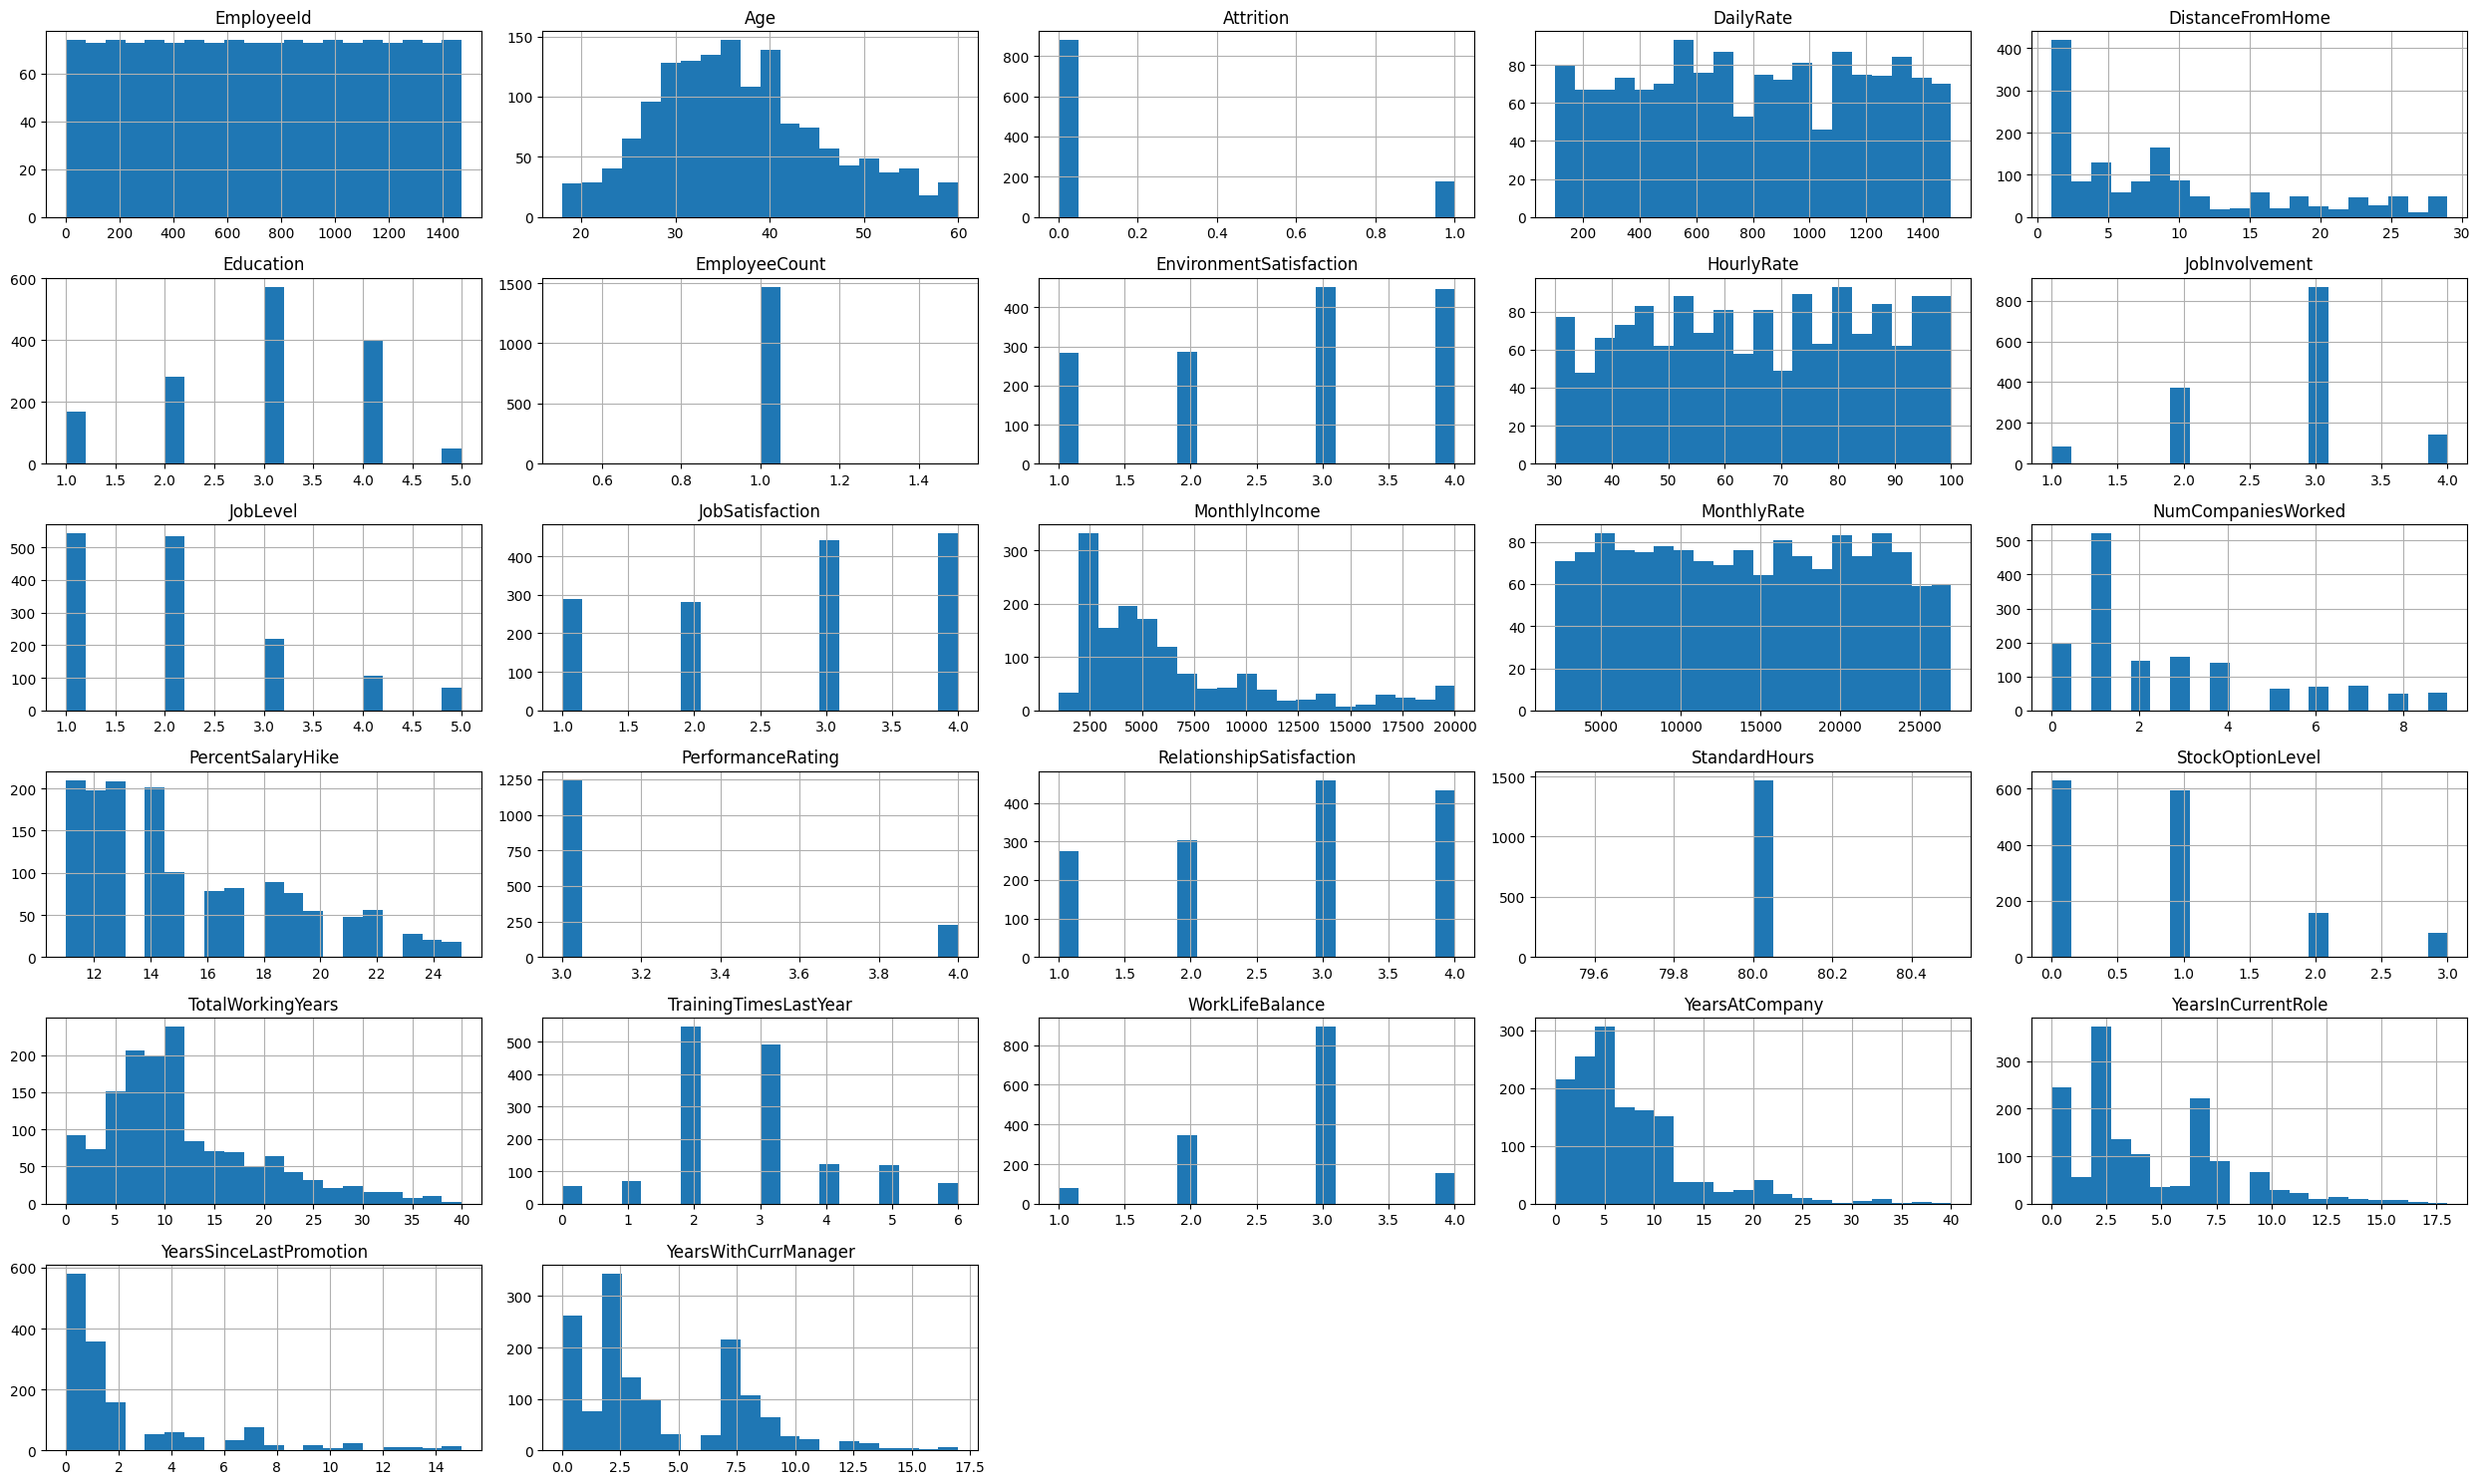

In [ ]:
df_employee[num_cols].hist(figsize=(25,15), bins=20)
plt.tight_layout()
plt.show()

persebaran dataset secara dominan memiliki peresebaran yang tidak terdistribusi normal

### Data Preprparation
Tahap ini menyiapkan data sebelum dilakukan modeling yang bertujuan untuk mengatasi missing value, melakukan encoded, feature selection dan melakukan splitting data.

menghilangkan missing value pada kolom Attrition

In [3]:
df_employee.dropna(subset='Attrition', inplace=True)

filtering data kategorikal untuk dilakukan encoded menggunakan LabelEncoder()

In [5]:
cat_cols = df_employee.select_dtypes(include=['object']).columns.tolist()

encoder = LabelEncoder()
for col in cat_cols:
    df_employee[col] = encoder.fit_transform(df_employee[col])

df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,2,1124,2,1,2,3,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,2,725,1,2,3,3,1,...,4,80,1,24,2,3,5,2,1,4


melakukan feature selection dan splitting dataset

In [57]:
X = df_employee[['OverTime', 'EducationField', 'Age', 'JobRole',  'MonthlyIncome', 'MaritalStatus', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Education', 'PerformanceRating', 'RelationshipSatisfaction', 'NumCompaniesWorked']]
y = df_employee['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

Submsiion ini melakukan modeling menggunakan algortima XGBClassifier() untuk melakukan klasifikasi karyawan yang akan regin.

In [58]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.8820754716981132


### SHAP Analisis
Tahap ini melakukan analisis SHAP summary plot untuk melihat pengaruh karyawan resign

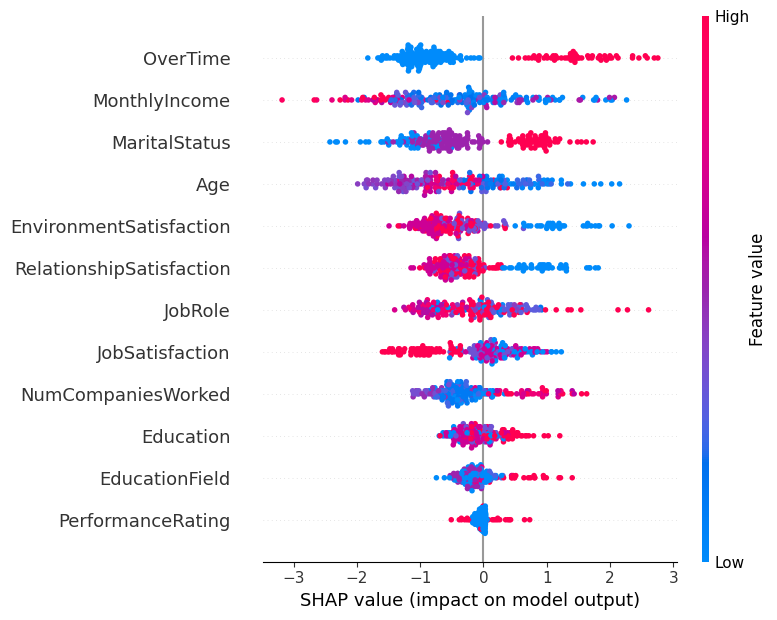

In [59]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test)


shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

Berdasarkan Hasil SHAP summary plot menunjukkan bahwa OverTime, MonthlyIncome, MartialStatus, dan Age adalah fitur terpenting dalam memprediksi attrition. Karyawan dengan jam lembur tinggi dan pendapatan rendah cenderung memiliki kemungkinan lebih tinggi untuk resign.

### Save Model Dan Deployment Sederhana ###
tahap ini adalah menyimpan model XGBClassifier yang sudah dilatih dengan format pickle lalu melakukan inferensi menggunakan xgb model yang telah disimpan dan menggunakan sampel dataset df_employee

In [62]:
joblib.dump(xgb_model, 'xgb_model.pkl')

model = joblib.load('xgb_model.pkl')

sample = df_employee.sample(5, random_state=42)
sample_for_prediction = sample[['OverTime', 'EducationField', 'Age', 'JobRole',  'MonthlyIncome', 'MaritalStatus', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Education', 'PerformanceRating', 'RelationshipSatisfaction', 'NumCompaniesWorked']]
predictions = model.predict(sample_for_prediction)
sample['Attrition_Prediction'] = ['Resign' if p == 1 else 'Stay' for p in predictions]
sample

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Prediction
628,629,43,0.0,1,775,2,15,3,1,1,...,80,1,7,5,3,2,2,2,2,Stay
402,403,29,1.0,2,121,2,27,3,2,1,...,80,3,10,3,2,10,4,1,9,Stay
443,444,33,0.0,2,117,1,9,3,3,1,...,80,1,15,5,3,14,10,4,10,Stay
40,41,50,0.0,2,316,2,8,4,2,1,...,80,1,4,2,3,2,2,2,2,Stay
588,589,39,1.0,2,1122,1,6,3,3,1,...,80,0,8,2,1,2,2,2,2,Resign
